# 06과 단변량분석 종합실습과제

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 배운 [파이썬 라이브러리 활용]과 [데이터 분석] 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings   
warnings.filterwarnings("ignore")  # 향후 버전에서 제외될 수 있다는 경고 메시지 감추기

## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|


# 카시트 정보

## 카시트 종류
* 신생아용
* 2~4세 토들러용
* 5세 이상 주니어용




2016년 11월, 도로교통법 일부가 개정되면서 만 12세 이하 어린이는 모든 좌석에서 안전띠나 카시트를 반드시 착용해야 하는 것으로, 이를 어길시 과태료 6만원이 부과된다.

종전 브랜드별 주니어용의 매출은 전체 5% 미만으로 매우 미약했으나, 
계도기간(2016년12월~2017년2월) 내 판매량이 급증한 것으로 집계됐다.


롯데닷컴은 도로교통법 개정 이후인 작년 12월부터 3개월간 카시트 매출이 전년 동기간 대비 26% 신장했다. 특히 주니어 카시트 판매량이 크게 증가, 전년 대비 38% 뛰었다.

옥션 역시 주니어 카시트 매출이 전년 대비 35% 증가했다.

주니어 카시트는 시장에서 경쟁력이 없다고 취급됐던 품목으로, 낮은 수요로 국내 브랜드는 모델 개발에 소극적이었고, 수입원 역시 토들러용 중심으로 상품을 들여왔다.

In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


### ① Sales (Target) 

In [3]:
var = 'Sales'

1) 변수의 비즈니스 의미

2) 숫자, 범주?

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [4]:
data[var].isnull().sum()

0

4) 가변수화 필요 여부

In [17]:
필요하지 않음

7.80    4
6.20    3
6.67    3
8.77    3
6.88    3
       ..
7.50    1
8.89    1
7.58    1
5.64    1
8.14    1
Name: Sales, Length: 336, dtype: int64

5) 기초통계량(수치화)

In [5]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

6) 분포 확인(시각화)

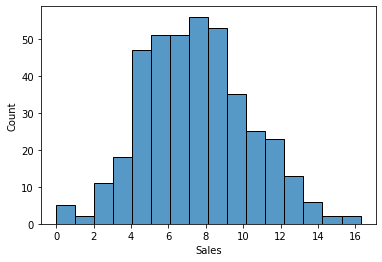

In [6]:
sns.histplot(data[var])
plt.show()

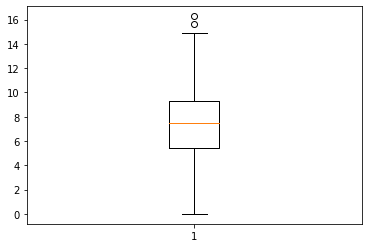

[5.39 0.  ]
[ 9.32 14.9 ]


In [7]:
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

4000~9000개 사이에 대부분이 분포되어 있다. 
살짝 왼쪽으로 치우쳐져 있다. 
판매개수가 0원인 지역도 존재한다. 그 지역에 왜 판매량이 1000를 넘지 않는 지 파악해야 할 것이다. 


8) 추가 분석해 볼 사항이 있나요?

In [ ]:
판매량 구간을 좀 더 세분화해서 분석할 수도 있을 것 같다. 

### ② CompPrice

In [10]:
var = 'CompPrice'

1) 변수의 비즈니스 의미

2) 숫자, 범주?

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [11]:
data[var].isnull().sum()

0

4) 가변수화 필요 여부

In [ ]:
필요하지 않음

5) 기초통계량(수치화)

In [13]:
data[var].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

6) 분포 확인(시각화)

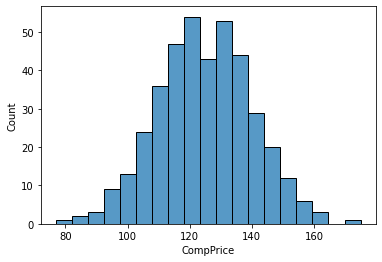

In [14]:
sns.histplot(data[var])
plt.show()

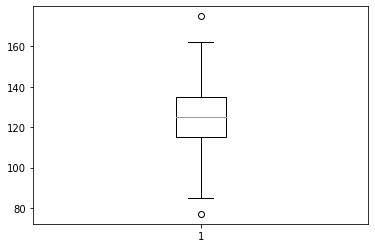

[115.  85.]
[135. 162.]


In [16]:
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
경쟁사 가격들마다 큰 차이가 있다기 보다는 
절반정도의 경쟁 회사들의 124달러 수준이다. 
우리 제품의 가격은 과연 얼마인지를 비교해야 경쟁사와의 가격 경쟁력을 비교할 수 있을 것이다. 

8) 추가 분석해 볼 사항이 있나요?

In [ ]:
과연 이 회사의 카시트 제품이 딱 하나일까? 
어떤 제품을 기준으로 가격 경쟁력이 있는가를 분명히 해야 한다. 

### ③ Income

In [18]:
var = 'Income'

1) 변수의 비즈니스 의미

In [ ]:
지역 평균 소득

2) 숫자, 범주?

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [19]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [ ]:
필요하지 않음

5) 기초통계량(수치화)

In [26]:
data[var].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

6) 분포 확인(시각화)

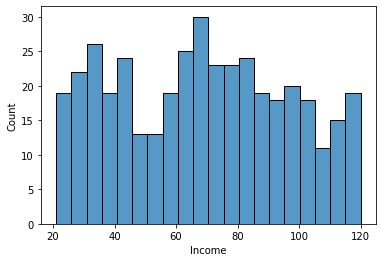

In [23]:
sns.histplot(data[var], bins = 20)
plt.show()

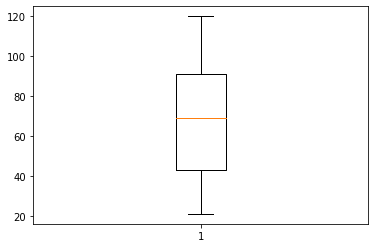

[42.75 21.  ]
[ 91. 120.]


In [24]:
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
지역별 빈부격차가 심한 편, 
그러나 지역 평균 소득이 과연 지역 전체를 대표할 수 있을까?

가난한 지역에 사는 
한달에 200만원 남짓 버는 가정에서 과연 차가 있을까?
차가 아예 없다면 카시트의 구매도 없을 것. 
혹은 싱글이 많은 지역 등이 포함되어 있는 것은 아닐까?
싱글은 카시트를 살 필요가 없다. 

-> 전 연령에 대한 인구별 평균 소득액인가? 성인에 대한 평균 소득액인가?
2만달러 ~ 12만달러이므로 연간소득일 것이다.
50%가 약 4만~ 9만달러

8) 추가 분석해 볼 사항이 있나요?

In [ ]:
정규분포를 띄지 않는다. 소득별 그룹을 2개로 나누어 분석해야 할 것이다. 
그 분석을 통해 소득에 맞는 저렴하거나 고급 제품들을 추천하는 것도 좋을 것이다. 
각 지역별로 결혼 상태에 대한 정보가 필요하다. 
싱글인 경우 카시트 구매 x

-> 평균 소득과 카시트 판매량과의 관계
-> 평균 소득과 카시트 가격과의 관계

### ④ Advertising

In [27]:
var = 'Advertising'

1) 변수의 비즈니스 의미

In [ ]:
각 지역, 회사의 경고 예산

2) 숫자, 범주?

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [29]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [ ]:
필요하지 않음

5) 기초통계량(수치화)

In [30]:
data[var].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

6) 분포 확인(시각화)

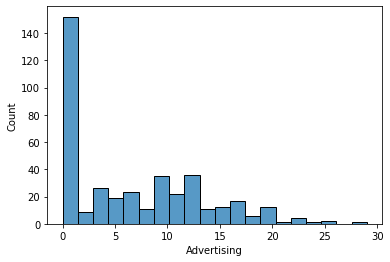

In [31]:
sns.histplot(data[var], bins = 20)
plt.show()

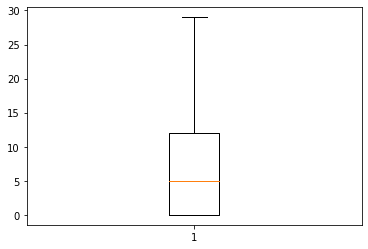

[0. 0.]
[12. 29.]


In [32]:
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
아예 광고를 하지 않는 지역이 거의 대부분이다.실제로 광고 비용이 적절하게 집행되고 
있지 않다. 
너무 지역 평균 소득을 보고 광고 비용을 책정한 것이 아닐까?
이유가 있을까?

In [3]:
# 광고비 예산이 0원인 지역의 비율
data.loc[data['Advertising'] == 0].shape[0] / data.shape[0]

0.36

In [ ]:
-> 광고비 예산이 0인 지역이 전체에 36%나 됨. 

8) 추가 분석해 볼 사항이 있나요?

In [ ]:
-> 광고비 예산 0을 제외하고 분포 확인 필요

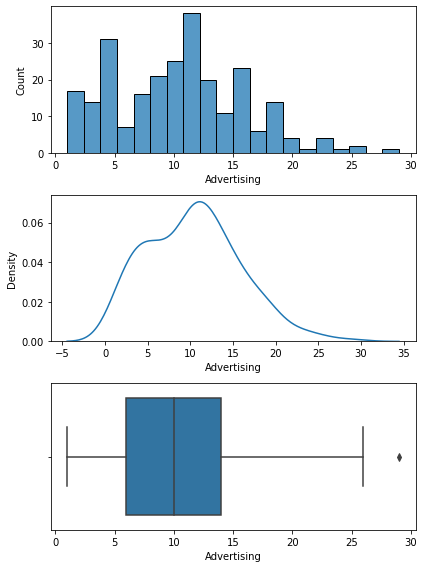

In [5]:
var = 'Advertising'
temp = data.loc[data[var] != 0]

plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(temp[var], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(temp[var])

plt.subplot(3,1,3)
sns.boxplot(temp[var])

plt.tight_layout()
plt.show()

* 광고비 5천달러 이내와 이후로 분포가 나뉨
* 광고비 0, 5천달러 이내, 5천달러 이상으로 구분하고, 광고비 예산 구분과, 지역, 소득수준, 인구수 등과 비교할 필요 있음

### ⑤ Population

In [33]:
var = 'Population'

1) 변수의 비즈니스 의미

In [ ]:
지역 인구수

2) 숫자, 범주?

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [34]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [ ]:
필요하지 않음

5) 기초통계량(수치화)

In [35]:
data[var].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

6) 분포 확인(시각화)

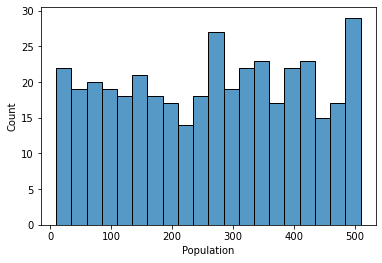

In [39]:
sns.histplot(data[var], bins = 20)
plt.show()

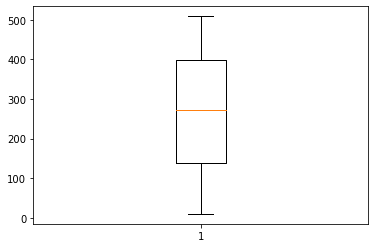

[139.  10.]
[398.5 509. ]


In [37]:
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())


7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
50만명을 넘는 지역도 30여군데가 있는데, 이 지역들의 구매력을 집중적으로 파악할 필요가 있다. 

-> 인구수가 거의 균등분포를 나타낸다. 왜?

8) 추가 분석해 볼 사항이 있나요?

In [ ]:
인구수의 데이터 중에서 카시트를 구매할 나이대의 인구수를 따로
그리고 20-40대의 남, 녀 인구수,
그리고 인구수뿐만 아니라
세대 수, 세대수의 결혼 상태에 대한 정보가 필요하다. 

-> 인구수에 따른 판매량 관계
-> 인구수와 평균연령의 관계

### ⑥ Price

In [40]:
var = 'Price'

1) 변수의 비즈니스 의미

In [41]:
자사 지역별 판매가격

SyntaxError: invalid syntax (<ipython-input-41-57e529efae9b>, line 1)

2) 숫자, 범주?

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [42]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [ ]:
필요하지 않음

5) 기초통계량(수치화)

In [43]:
data[var].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

6) 분포 확인(시각화)

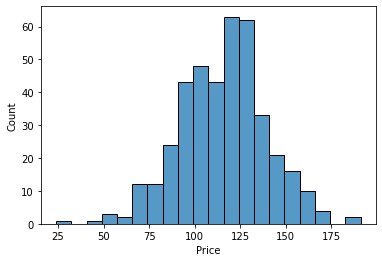

In [44]:
sns.histplot(data[var], bins = 20)
plt.show()

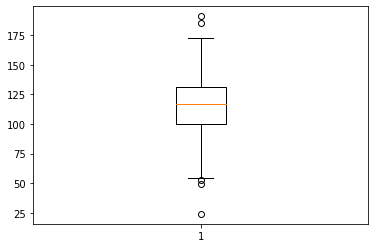

[100.  54.]
[131. 173.]


In [45]:
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
24~ 191달러의 범위를 가지고 있으며, 이는 경쟁사보다 범위가 넓다. 

8) 추가 분석해 볼 사항이 있나요?

In [ ]:
가격에 따라 판매량이 달라질 것인가
자사 가격과 경쟁사 가격 비교

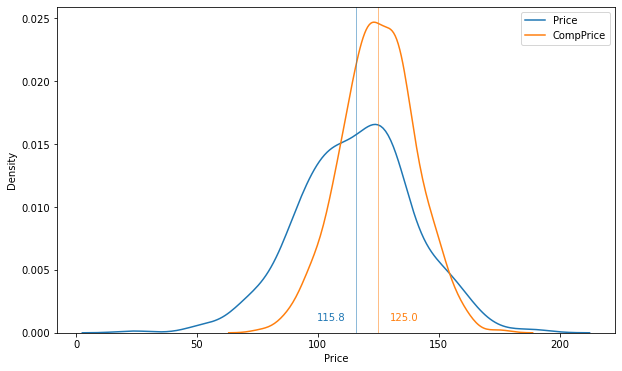

In [6]:
plt.figure(figsize = (10,6))
sns.kdeplot(data['Price'], label = 'Price')
sns.kdeplot(data['CompPrice'], label = 'CompPrice')

price_mean = round(np.mean(data['Price']),1)
com_mean = round(np.mean(data['CompPrice']),1)

plt.axvline(price_mean, color = 'C0', linewidth = .5)
plt.axvline(com_mean, color = 'C1', linewidth = .5)

plt.text(price_mean-16, 0.001, price_mean, color = 'C0')
plt.text(com_mean+5, 0.001, com_mean, color = 'C1')

plt.legend()
plt.show()

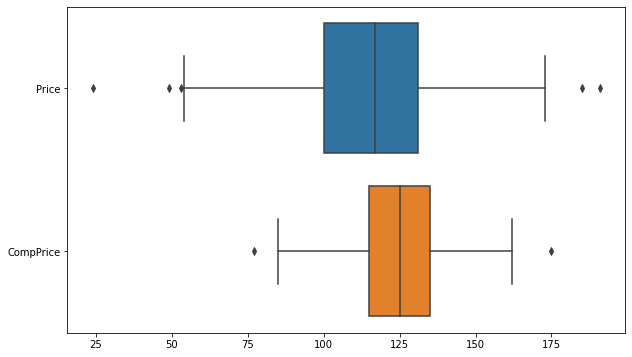

In [7]:
plt.figure(figsize = (10,6))
sns.boxplot(data=data[['Price','CompPrice']], orient="h")
plt.show()

### ⑦ ShelveLoc

In [9]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미

In [ ]:
진열상태

2) 숫자, 범주?

In [ ]:
범주

3) NaN 존재 유무 및 조치방안

In [52]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [70]:
data[var] = data[var].map({2:'Good', 1:'Medium', 0: 'Bad'})

5) 기초통계량(수치화)

In [71]:
print(data[var].value_counts())
print(data[var].value_counts()/ len(data[var]))

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64


6) 분포 확인(시각화)

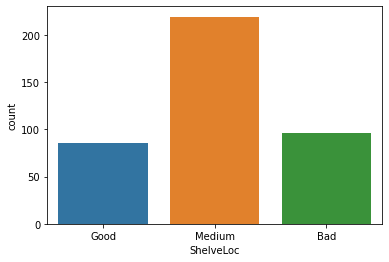

In [10]:
sns.countplot(data[var], order = ['Good', 'Medium', 'Bad'])
plt.show()

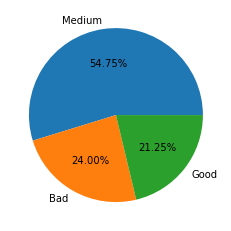

In [73]:
ShelveLoc = pd.Series(data[var])

cnt = ShelveLoc.value_counts()
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()


7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
진열 상태가 'Bad'가 'Good'과 비슷한 수치임. 시정해야 함. 

8) 추가 분석해 볼 사항이 있나요?

In [ ]:
진열상태가 구체적으로 무엇을 의미하는 것일까? 고객들의 눈에 띄는 곳인가 아닌가
인구수와 진열상태가 관련이 있을까?
진열 상태에 따라 판매량이 차이가 있을까?

### ⑧ Age

In [74]:
var = 'Age'

1) 변수의 비즈니스 의미

2) 숫자, 범주?

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [75]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [ ]:
필요하지 않음

5) 기초통계량(수치화)

In [76]:
data[var].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

6) 분포 확인(시각화)

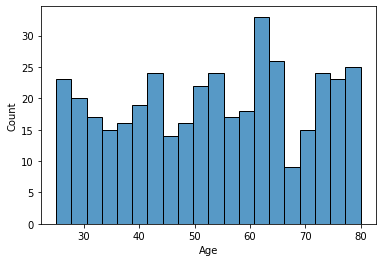

In [77]:
sns.histplot(data[var], bins = 20)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
평균 연령이 그 지역을 대표할 수는 없다. 
그 지역이 어떤 사람들이 많이 사는지,
20대 젊은 부부, 40대 중장년층, 70대 이상의 노부부들이 은퇴하고 사는 곳인지 등의
지역별 특성을 파악해야 할 것이다.

* 지역별 평균나이는 거의 균등분포로 보임.
* 균등분포 ==> 임의로 이렇게 모았거나, 여러 분포가 섞였거나, 이상치를 처리했거나...

* 평균나이
    * 지역 인구 전체에 대한 평균
    * 카시트가 필요한 사람은, 약 10세 이하 자녀를 둔 부모
    * 10세 이하 자녀들과 20대후반 ~ 40세의 부모가 주축인 인구의 평균 나이는?

8) 추가 분석해 볼 사항이 있나요?

In [ ]:
뚝 떨어진 평균 연령 67세의 지역 왜 그런 것인지 궁금하다.
가장 판매량이 높은 평균나이는?

### ⑨ Urban

In [11]:
var = 'Urban'

1) 변수의 비즈니스 의미

In [ ]:
도심 지역 여부

2) 숫자, 범주?

In [ ]:
범주

3) NaN 존재 유무 및 조치방안

In [79]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [ ]:
필요함

5) 기초통계량(수치화)

In [81]:
print(data[var].value_counts())
print(data[var].value_counts() / len(data[var]))

Yes    282
No     118
Name: Urban, dtype: int64
Yes    0.705
No     0.295
Name: Urban, dtype: float64


6) 분포 확인(시각화)

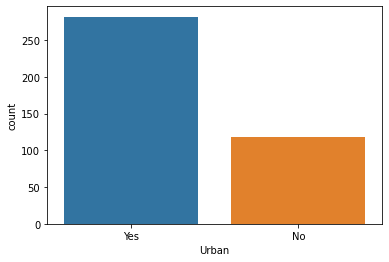

In [12]:
sns.countplot(data[var])
plt.show()

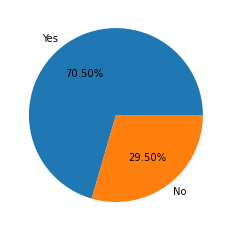

In [84]:
Urban = pd.Series(data[var])

cnt = Urban.value_counts()
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
약 70% 매장이 도심에 있다.

도심지역이냐 아니냐
도심 지역이라고 차를 더 많이 소유하고 있을까?
물론 도심 지역일수록 경제 인구가 많이 거주하기 때문에 
아이들이 많을 확률이 더 높긴 하다. 

8) 추가 분석해 볼 사항이 있나요?

In [ ]:
도시와 지방의 인구수, 소득수준, 자사 가격, 경쟁사 가격, 광고예산, 판매량 비교 필요

### ⑩ US

In [13]:
var = 'US'

1) 변수의 비즈니스 의미

In [ ]:
매장이 미국에 있는 지 여부

2) 숫자, 범주?

In [ ]:
범주

In [14]:
data[var].unique()

array(['Yes', 'No'], dtype=object)

3) NaN 존재 유무 및 조치방안

In [86]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [ ]:
필요

5) 기초통계량(수치화)

In [87]:
print(data[var].value_counts())
print(data[var].value_counts()/ len(data[var]))

Yes    258
No     142
Name: US, dtype: int64
Yes    0.645
No     0.355
Name: US, dtype: float64


6) 분포 확인(시각화)

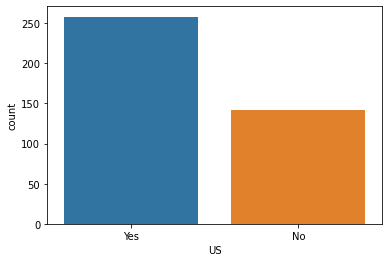

In [15]:
sns.countplot(data[var])
plt.show()

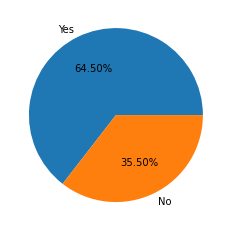

In [89]:
US = pd.Series(data[var])
cnt = US.value_counts()
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
국내 시장에만 집중되어 있다. 65퍼센트
해외 시장에도 눈을 돌려야 할 것이다. 

8) 추가 분석해 볼 사항이 있나요?

In [ ]:
국내외 판매량,판매가, 매출액, 경쟁사 가격,  광고비 등을 추가 분석